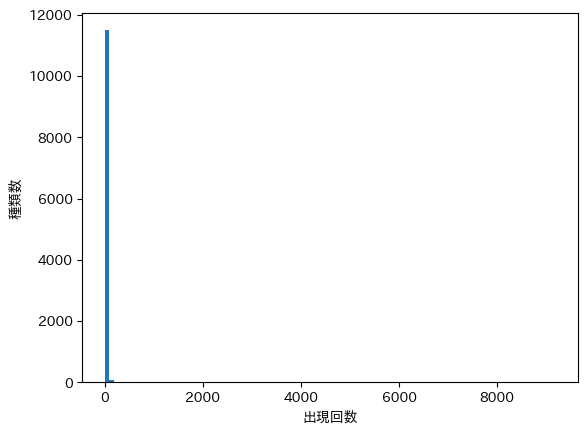

In [16]:
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib_fontja                              #plt日本語表示用のモジュール

def read_mecab(file):
    results = []
    sentence = []
    with open(file,"r") as f:
        for line in f:                                 #ファイルから1行ずつ読み込んで処理
            if line == 'EOS\n':                        #EOSで文の終わりを判定
                if len(sentence) != 0:                 #sentenceに要素が入っていれば結果に格納
                    results.append(sentence)
                    sentence = []                      #sentenceをリセット
            else:                                      #EOS出なけらば各文に対して以下の処理を行う
                morpheme1 = line.split('\t')           #表層形の取得
                morpheme2 = morpheme1[1].split(',')    #各種形態素の取得
                words = {'surface':morpheme1[0],       #単語ごとに辞書に格納
                         'base':morpheme2[6],
                         'pos':morpheme2[0],
                         'pos1':morpheme2[1]}
                sentence.append(words)
    
    if len(sentence) != 0:                             #余りの分の処理
        results.append(sentence)
        sentence = []
    
    return results

file = 'neko.txt.mecab'
results = read_mecab(file)
count = []
for sentence in results:
    for word in sentence:
        if word['pos'] != '記号':                      #記号以外の単語を集める
            count.append(word['base'])

c = Counter(count)                                     #collection.Counterで数える
ans = c.values()                                       #valisメソッドで全単語の出現回数のみを取得

fig,ax = plt.subplots()
ax.hist(ans,bins=100)                                  #binsで表示する棒(bin)の数を指定できる
ax.set_xlabel('出現回数')
ax.set_ylabel('種類数')
plt.show()